In [14]:
import pandas as pd
import numpy as np
from os import path
import gtfparse
import pyensembl
pyensembl.EnsemblRelease(release=87)
import gspread
from  oauth2client.service_account  import ServiceAccountCredentials
import gspread
import sys
import seaborn as sns
from random import sample 
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
from fish_helpers import *
fname = '/bigstore/binfo/mouse/Cornea/GSE115355_161227_170125_epi_stroma_gene_RPKM.xlsx'
RPKM = pd.read_excel(fname,index_col=0)
RPKM

,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
Sample ID,,,,,,,,,,,,,,,,,,,,,
Tissue,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,Epi,...,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma,Stroma
Description,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_untreated,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_control_MMC,Epi_wounded_untreated,Epi_wounded_untreated,...,Stroma_control_MMC,Stroma_control_MMC,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_untreate,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC,Stroma_wounded_MMC
Group,1,1,1,1,2,2,2,2,3,3,...,2,2,3,3,3,3,4,4,4,4
ID,s071,s073,s075,s077,s079,s081,s083,s085,s072,s074,...,s045,s047,s034,s036,s038,s040,s042,s044,s046,s048
0610005C13Rik,0.0353911,0.0199339,0.0670852,0.0354595,0.121699,0.0412891,0.018012,0.0414942,0.0208569,0,...,0.0304248,0.0505636,0.163281,0.0166548,0,0,0.0692133,0,0,0.0857614
0610007P14Rik,38.0668,39.1071,28.4881,30.8212,37.1201,34.2854,38.1678,29.5447,51.0487,38.9366,...,31.4287,46.1519,40.9497,44.1225,18.7655,34.7092,33.2747,41.7401,39.9045,30.2558
0610009B22Rik,26.1133,42.8366,29.2011,25.879,28.8057,24.5347,32.6269,18.5469,24.6162,17.6262,...,35.7014,35.8211,40.2175,27.1289,36.108,37.951,28.6589,30.4305,29.8874,29.9761
0610009L18Rik,0.898098,0.578114,1.24639,0.73915,0.94539,0.710986,0.652973,0.338456,0.529273,0.153531,...,1.46142,1.64973,1.03587,1.35848,4.16195,1.22101,0.909557,0.802346,3.30115,1.95869
0610009O20Rik,9.72072,9.48905,12.2571,11.9567,10.9457,12.2847,10.4238,12.2683,9.79277,8.92444,...,14.2817,13.756,11.363,13.2281,11.8876,12.3818,12.581,13.8603,17.2885,14.0716


In [15]:
scope = ['https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive']
# Path to .json
path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/ProbeDesign-92ebdb6a17a7.json'
creds = ServiceAccountCredentials.from_json_keyfile_name(path, scope)
client = gspread.authorize(creds)
# Start with a gene list 
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
expression_df

INFO:oauth2client.client:Refreshing access_token


,,Abs(Fold),Barcode,Description,Early_G1,FPKM,FPKM_2,Flag,G1_Z,G2/M,...,Length,Oligos,Pathway,Purpose,S,S_Z,Transcript_ID,Unwounded FPKM,Wounded FPKM,Zscore
0,Passed,1.04498,100000000000000111,"nuclear factor, erythroid derived 2, like 2 [S...",,47.62,23.6707,,,,...,"2,475.00",110,,Control,,,ENSMUST00000102672,23.1501,24.1914,0.5
1,Passed,1.00175,100000000010001100,"lectin, mannose-binding 2 [Source:MGI Symbol;A...",,39.61,30.3676,,,,...,"4,315.00",120,,Control,,,ENSMUST00000021940,30.3411,30.3941,0.03
2,Passed,1.04448,101000001000010,guanine nucleotide binding protein (G protein)...,,33.80,34.0193,,,,...,"4,248.00",120,,Control,,,ENSMUST00000043148,34.7595,33.2791,-0.65
3,Passed,1.04491,100100010000000001,"testis-specific protein, Y-encoded-like 1 [Sou...",,33.33,13.2525,,,,...,"3,086.00",108,,Control,,,ENSMUST00000061372,13.5436,12.9614,-1.08
4,Passed,1.05641,10000001000100100,signal recognition particle receptor ('docking...,,33.04,38.7194,,,,...,"2,993.00",120,,Control,,,ENSMUST00000034541,37.6574,39.7815,0.92
5,Passed,1.01649,1000000110001000,NOC2 like nucleolar associated transcriptional...,,31.75,19.7026,,,,...,"2,785.00",120,,Control,,,ENSMUST00000179543,19.5416,19.8637,0.17
6,Passed,1.00686,110001100000000,"solute carrier family 31, member 1 [Source:MGI...",,27.04,14.692,,,,...,"3,718.00",120,,Control,,,ENSMUST00000084526,14.6417,14.7422,0.16
7,Passed,1.03843,10010001000000010,ataxin 10 [Source:MGI Symbol;Acc:MGI:1859293],,26.67,36.0589,,,,...,"1,937.00",113,,Control,,,ENSMUST00000163242,35.379,36.7388,0.88
8,Passed,1.001,10000010101000000,malectin [Source:MGI Symbol;Acc:MGI:1924015],,25.98,36.7615,,,,...,"5,955.00",120,,Control,,,ENSMUST00000112121,36.7799,36.7431,-0.02
9,Passed,1.03657,1001101000000000,"retinoblastoma binding protein 4, chromatin re...",,23.72,30.216,,,,...,"4,407.00",120,,Control,,,ENSMUST00000102598,29.6735,30.7586,0.56


In [167]:
Samples = RPKM.iloc[:4]
Expression = RPKM.iloc[4:]
Stroma_col = [i for i in Samples.columns if 'Stroma' in Samples[i].loc['Description']]
Epi_col = [i for i in Samples.columns if 'Epi' in Samples[i].loc['Tissue']]
Wounded_col = [i for i in Samples.columns if 'wounded' in Samples[i].loc['Description']]
untreated_col = [i for i in Samples.columns if 'untreate' in Samples[i].loc['Description']]
Epi_wounded_droppers = []
Epi_unwounded_droppers = []
Epi_untreated_droppers = []
Stroma_wounded_droppers = []
Stroma_unwounded_droppers = []
Stroma_untreated_droppers = []
for i in Samples.columns:
    if not i in Epi_col:
        Epi_wounded_droppers.append(i)
        Epi_unwounded_droppers.append(i)
        Epi_untreated_droppers.append(i)
    elif not i in untreated_col:
        Epi_wounded_droppers.append(i)
        Epi_unwounded_droppers.append(i)
        Epi_untreated_droppers.append(i)
    elif not i in Wounded_col:
        Epi_wounded_droppers.append(i)
    else:
        Epi_unwounded_droppers.append(i)
    if not i in Stroma_col:
        Stroma_wounded_droppers.append(i)
        Stroma_unwounded_droppers.append(i)
        Stroma_untreated_droppers.append(i)
    elif not i in untreated_col:
        Stroma_wounded_droppers.append(i)
        Stroma_unwounded_droppers.append(i)
        Stroma_untreated_droppers.append(i)
    elif not i in Wounded_col:
        Stroma_wounded_droppers.append(i)
    else:
        Stroma_unwounded_droppers.append(i)
        
untreated_Epi_RPKM = Expression.drop(columns=Epi_untreated_droppers)
wounded_untreated_Epi_RPKM = Expression.drop(columns=Epi_wounded_droppers)
unwounded_untreated_Epi_RPKM = Expression.drop(columns=Epi_unwounded_droppers)
untreated_Epi_RPKM = untreated_Epi_RPKM[(np.mean(untreated_Epi_RPKM,axis=1)>1)&(np.mean(untreated_Epi_RPKM,axis=1)<500)]
wounded_untreated_Epi_RPKM = wounded_untreated_Epi_RPKM.loc[untreated_Epi_RPKM.index]
unwounded_untreated_Epi_RPKM = unwounded_untreated_Epi_RPKM.loc[untreated_Epi_RPKM.index]
ave_unwounded_untreated_Epi_RPKM = np.mean(unwounded_untreated_Epi_RPKM,axis=1)

untreated_Stroma_RPKM = Expression.drop(columns=Stroma_untreated_droppers)
wounded_untreated_Stroma_RPKM = Expression.drop(columns=Stroma_wounded_droppers)
unwounded_untreated_Stroma_RPKM = Expression.drop(columns=Stroma_unwounded_droppers)
untreated_Stroma_RPKM = untreated_Stroma_RPKM[(np.mean(untreated_Stroma_RPKM,axis=1)>1)&(np.mean(untreated_Stroma_RPKM,axis=1)<500)]
wounded_untreated_Stroma_RPKM = wounded_untreated_Stroma_RPKM.loc[untreated_Stroma_RPKM.index]
unwounded_untreated_Stroma_RPKM = unwounded_untreated_Stroma_RPKM.loc[untreated_Stroma_RPKM.index]
ave_unwounded_untreated_Stroma_RPKM = np.mean(unwounded_untreated_Stroma_RPKM,axis=1)

In [168]:
Limbus = pd.read_csv('/bigstore/GeneralStorage/Zach/MERCI/Graph-based Genes.csv')
Limbus.index = Limbus['FeatureName']
Limbus = Limbus.drop(columns=[i for i in Limbus.columns if 'Value' in i])
Limbus = Limbus.drop(columns=[i for i in Limbus.columns if 'Fold' in i])
Ave_Limbus = np.mean(Limbus.drop(columns=[i for i in Limbus.columns if not'Ave' in i]),axis=1)

In [169]:
Endo = pd.read_csv('/bigstore/binfo/mouse/Endothelial/GSE62974_FPKM_C166.txt',sep='\t',index_col=0)
Endo = Endo.drop(columns=[i for i in Endo.columns if not 'CTRL' in i])
Avg_Endo = np.mean(Endo,axis=1)

In [170]:
genes = []
Limbus_expression = []
Epi_expression = []
Endo_expression = []
Stroma_expression = []
thresh = 0
for gene,limbal_express in Ave_Limbus.items():
    if gene in ave_unwounded_untreated_Epi_RPKM.index:
        if gene in Avg_Endo.index:
            if gene in ave_unwounded_untreated_Stroma_RPKM.index:
                stroma_express = ave_unwounded_untreated_Stroma_RPKM.loc[gene]
                endo_express = Avg_Endo.loc[gene]
                epi_express = ave_unwounded_untreated_Epi_RPKM.loc[gene]
                try:
                    if epi_express<=thresh:
                        continue
                    elif limbal_express<=thresh:
                        continue
                    elif endo_express<=thresh:
                        continue
                    elif stroma_express<=thresh:
                        continue
                except:
                    continue
                Limbus_expression.append(limbal_express)
                Epi_expression.append(epi_express)
                Endo_expression.append(endo_express)
                Stroma_expression.append(stroma_express)
                genes.append(gene)
print(len(Epi_expression))

9178


In [533]:
from statistics import mean
import numpy as np
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    print(m,b)
    return m, b

In [534]:
norm_limb = Limbus_expression
m,b = best_fit_slope_and_intercept(np.log10(Limbus_expression),np.log10(Epi_expression))
norm_epi = 10**(np.log10(Epi_expression)-b)/m
norm_epi -= np.median(norm_epi)-np.median(norm_limb)
m,b = best_fit_slope_and_intercept(np.log10(Limbus_expression),np.log10(Endo_expression))
norm_endo = 10**(np.log10(Endo_expression)-b)/m
norm_endo -= np.median(norm_endo)-np.median(norm_limb)
m,b = best_fit_slope_and_intercept(np.log10(Limbus_expression),np.log10(Stroma_expression))
norm_stroma = 10**(np.log10(Stroma_expression)-b)/m
norm_stroma -= np.median(norm_stroma)-np.median(norm_limb)

0.5672695348714402 1.3251939427526322
0.5460971833451902 1.3602968326243958
0.5162423031565586 1.2715996624532708


In [536]:
print(np.median(norm_limb))
print(np.median(norm_endo))
print(np.median(norm_epi))
print(np.median(norm_stroma))

0.2576587186776325
0.25765871867763246
0.25765871867763257
0.2576587186776324


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


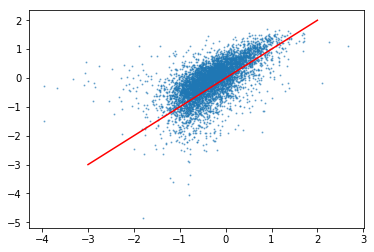

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


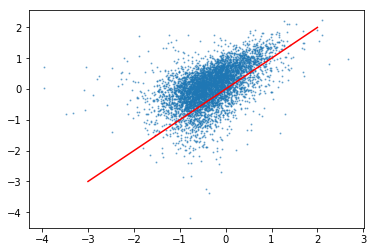

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


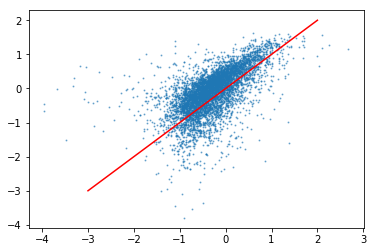

In [537]:
X = np.log10(norm_limb)
x  = [-3,2]
y = [-3,2]
plt.scatter(X,np.log10(norm_epi),alpha=0.5,s=1)
plt.plot(x,y,c='r')
plt.show()
plt.scatter(X,np.log10(norm_endo),alpha=0.5,s=1)
plt.plot(x,y,c='r')
plt.show()
plt.scatter(X,np.log10(norm_stroma),alpha=0.5,s=1)
plt.plot(x,y,c='r')
plt.show()


In [538]:
norm_expression = pd.DataFrame(index=genes)
norm_expression['norm_epi'] = pd.Series(norm_epi,index=genes)
norm_expression['norm_limb'] = pd.Series(norm_limb,index=genes)
norm_expression['norm_endo'] = pd.Series(norm_endo,index=genes)
norm_expression['norm_stroma'] = pd.Series(norm_stroma,index=genes)
norm_expression

,norm_epi,norm_limb,norm_endo,norm_stroma
Malat1,13.001396,474.817680,9.192549,14.650313
Mt1,17.351648,183.092466,6.534143,19.209777
Rpl26,19.322296,50.199108,2.643423,16.656443
Rps15a,8.275588,49.037406,3.604946,7.745281
Rpl37,37.028318,49.204085,31.365478,35.263862
Rpl21,31.056911,47.030992,21.773248,25.054038
H3f3b,32.899125,49.840346,19.818047,29.625465
Rpl34,19.475524,40.179762,-0.460484,16.904138
Eif1,25.172564,50.960819,30.593659,25.352301
Sat1,17.005720,22.422946,5.960563,9.994499


In [163]:
norm_expression

NameError: name 'norm_expression' is not defined

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


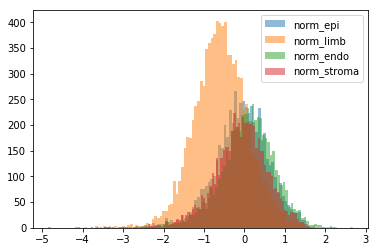

In [539]:
for i in norm_expression.columns:
    if 'norm' in i:
        plt.hist(np.log10(norm_expression[i]),bins=100,label=i,alpha=0.5)
plt.legend()
plt.show()

In [540]:
norm_expression['fold_limb'] = norm_expression['norm_limb']/norm_expression['norm_epi']
norm_expression['fold_endo'] = norm_expression['norm_endo']/norm_expression['norm_epi']
norm_expression['fold_stroma'] = norm_expression['norm_stroma']/norm_expression['norm_epi']

In [543]:
filtered_norm_expression = norm_expression[np.min(norm_expression.drop(columns=[i for i in norm_expression if 'fold' in i]),axis=1)>1]
print('Limbal:',len(filtered_norm_expression[filtered_norm_expression['fold_limb']>2]))
print('Endo:',len(filtered_norm_expression[filtered_norm_expression['fold_endo']>4]))
print('Stroma:',len(filtered_norm_expression[filtered_norm_expression['fold_stroma']>2]))

Limbal: 41
Endo: 83
Stroma: 19


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


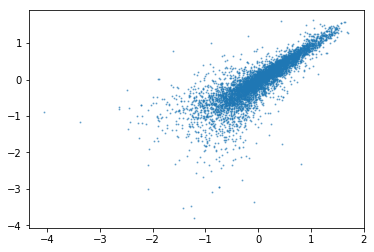

In [545]:
plt.scatter(np.log10(norm_epi),np.log10(norm_stroma),alpha=0.5,s=1)
plt.show()

In [546]:
Zscore_untreated_Epi_RPKM = (np.mean(wounded_untreated_Epi_RPKM,axis=1)-np.mean(unwounded_untreated_Epi_RPKM,axis=1))/np.std(unwounded_untreated_Epi_RPKM,axis=1)
abs_Zscore_untreated_Epi_RPKM = np.abs(Zscore_untreated_Epi_RPKM).sort_values()

In [570]:
Fold_untreated_Epi_RPKM = np.log10((np.mean(wounded_untreated_Epi_RPKM,axis=1)/np.mean(unwounded_untreated_Epi_RPKM,axis=1)))
abs_Fold_untreated_Epi_RPKM = np.abs(Fold_untreated_Epi_RPKM).sort_values()

In [571]:
abs_Fold_untreated_Epi_RPKM

Sample ID
Tcn2        0.000007
Pes1        0.000017
Tut1        0.000025
Cul4a       0.000044
Metap2      0.000069
Golgb1      0.000072
Coq7        0.000091
Fam179b     0.000095
Adgrl2      0.000120
Maz         0.000126
Arid1a      0.000126
Ep400       0.000134
Mgat5       0.000140
Gltscr1     0.000147
Usp12       0.000156
Pus7        0.000159
Fam178a     0.000160
Trim33      0.000160
Actr5       0.000172
Sucla2      0.000179
Zc3h10      0.000191
Dctpp1      0.000192
Cmss1       0.000193
Crcp        0.000207
Fndc3b      0.000213
Etaa1       0.000236
Chka        0.000253
Slc30a1     0.000281
Gemin5      0.000296
Cep44       0.000297
              ...   
Msn         1.287435
Sbsn        1.297672
Sh2d5       1.327309
Timp1       1.339240
Akr1b8      1.339363
Tnfrsf23    1.348702
Fhl2        1.355249
Actn1       1.371749
Col18a1     1.375416
Smim3       1.395764
Asns        1.462608
Fabp4       1.468855
Dmkn        1.488647
Fblim1      1.505009
Slc16a3     1.505983
Ngf         1.571064
Stf

In [195]:
list(set(abs_Fold_untreated_Epi_RPKM.iloc[-50:].index).intersection(abs_Zscore_untreated_Epi_RPKM.iloc[-50:].index))

['Slc16a3',
 'Akr1b8',
 'Fosl1',
 'Ppbp',
 'Sprr1b',
 'Sbsn',
 'Dmkn',
 'Serpine1',
 'Fblim1',
 'Hmga2',
 'Cpn1',
 'Stfa2',
 'Myo1b',
 'Lypd5',
 'Sprr1a',
 'Mmp13',
 'Cdsn',
 'Krt18',
 'Fxyd5',
 'Tnfrsf23',
 'Asns',
 'Sh2d5',
 'Ercc1',
 'Scd3',
 'Dynap',
 'Trib3',
 'Csn3',
 'Ngf',
 'Col18a1',
 'Timp1',
 'Nat8l']

In [196]:
n = 100
keepers = list(set(Fold_untreated_Epi_RPKM.iloc[-n:].index).intersection(Zscore_untreated_Epi_RPKM.iloc[-n:].index))
for i in keepers:
    print(i)
    print('wounded:',np.mean(wounded_untreated_Epi_RPKM.loc[i]))
    print('unwounded:',np.mean(unwounded_untreated_Epi_RPKM.loc[i]))
    print('fold:',np.mean(Fold_untreated_Epi_RPKM.loc[i]))
    print('Z:',np.mean(Zscore_untreated_Epi_RPKM.loc[i]))
    print('')

Zscan12
wounded: 0.9063097499999999
unwounded: 1.2666549999999999
fold: 0.7155142876315966
Z: -7.96113879366056

Znf41-ps
wounded: 1.8358974999999997
unwounded: 2.4763725
fold: 0.7413656467272188
Z: -1.1922080193535698

Zfx
wounded: 4.134705
unwounded: 4.5041975
fold: 0.9179670740459317
Z: -0.4385680722928573

Zmym6
wounded: 2.3430400000000002
unwounded: 3.7279699999999996
fold: 0.6285029117723588
Z: -3.7235745392695874

l7Rn6
wounded: 6.322655
unwounded: 5.4472975
fold: 1.16069573949284
Z: 2.5508439759107646

Zfp939
wounded: 0.87422175
unwounded: 1.662625
fold: 0.5258081347267123
Z: -2.5897824843359993

Zzz3
wounded: 4.23437
unwounded: 5.6548025
fold: 0.748809529598956
Z: -6.161585682930193

Zhx1
wounded: 5.8361125000000005
unwounded: 7.7759325
fold: 0.7505353859488879
Z: -1.7802121425748607

Zfp955a
wounded: 2.5325925
unwounded: 3.5577824999999996
fold: 0.7118457915850674
Z: -1.4851311204148336

Zfp948
wounded: 1.352585
unwounded: 1.8262225
fold: 0.740646334167934
Z: -0.7310486145915

In [559]:
unwounded_untreated_Epi_RPKM

,s071,s073,s075,s077
Sample ID,,,,
0610007P14Rik,38.0668,39.1071,28.4881,30.8212
0610009B22Rik,26.1133,42.8366,29.2011,25.879
0610009O20Rik,9.72072,9.48905,12.2571,11.9567
0610010K14Rik,26.5957,35.1289,34.9141,44.0343
0610011F06Rik,16.2801,16.7399,20.3256,26.7363
0610012G03Rik,6.99127,8.3839,8.86749,10.4522
0610030E20Rik,5.3549,4.59785,4.9857,5.18718
0610037L13Rik,16.4109,18.0686,14.3284,14.9548
0610040B10Rik,3.2489,4.52399,2.77984,2.75786


In [613]:
deg_keepers = []
master_std = np.std(unwounded_untreated_Epi_RPKM,axis=1)+np.std(wounded_untreated_Epi_RPKM,axis=1)
avg_untreated_Epi_RPKM = np.mean(untreated_Epi_RPKM,axis=1)
relative_std = master_std/avg_untreated_Epi_RPKM
avg_unwounded_untreated_Epi_RPKM = np.mean(unwounded_untreated_Epi_RPKM,axis=1)
avg_wounded_untreated_Epi_RPKM = np.mean(wounded_untreated_Epi_RPKM,axis=1)
for gene in untreated_Epi_RPKM.index:
    if gene in deg_keepers:
        continue
    FPKM1=avg_unwounded_untreated_Epi_RPKM.loc[gene]
    FPKM2=avg_wounded_untreated_Epi_RPKM.loc[gene]
    if FPKM1<1 or FPKM2<1:
        continue
    if FPKM1>100 or FPKM2>100:
        continue
    STD = relative_std.loc[gene]
    if STD>0.2:
        continue
    Fold = abs_Fold_untreated_Epi_RPKM.loc[gene]
    if Fold<np.log10(1.75):
        continue
    Zscore = abs_Zscore_untreated_Epi_RPKM.loc[gene]
    if Zscore<5:
        continue
    print('gene:',gene)
    print('FPKM_U:',FPKM1)
    print('FPKM_W:',FPKM2)
    print('STD:',STD)
    print('Fold:',Fold)
    print('Zscore:',Zscore)
    print('')
    deg_keepers.append(gene)
print(len(deg_keepers))

gene: 1700096K18Rik
FPKM_U: 1.9516274999999998
FPKM_W: 1.0967285
STD: 0.1989965846532148
Fold: 0.25029779968508586
Zscore: 5.046604736653348

gene: 2810013P06Rik
FPKM_U: 3.2829925
FPKM_W: 1.321015
STD: 0.13890375869533195
Fold: 0.39536214156908334
Zscore: 6.926003611963288

gene: 5730409E04Rik
FPKM_U: 4.579365
FPKM_W: 2.5311575
STD: 0.12908924427732513
Fold: 0.2574860907570445
Zscore: 7.559732278729566

gene: A130010J15Rik
FPKM_U: 4.21758
FPKM_W: 10.083120000000001
STD: 0.14221510274201554
Fold: 0.3785316066584209
Zscore: 44.52084282360956

gene: Aaas
FPKM_U: 4.691465
FPKM_W: 10.607032499999999
STD: 0.19473982262885156
Fold: 0.35428541885182924
Zscore: 10.169614092327045

gene: Aars
FPKM_U: 12.63875
FPKM_W: 33.611799999999995
STD: 0.0636126198767637
Fold: 0.42478764730344987
Zscore: 28.38611689023911

gene: Acat2
FPKM_U: 22.595750000000002
FPKM_W: 54.436800000000005
STD: 0.16054925177149823
Fold: 0.3818658267725605
Zscore: 28.931342862645444

gene: Acot11
FPKM_U: 2.2951049999999995
FPK

gene: Entpd7
FPKM_U: 1.34551775
FPKM_W: 2.52621
STD: 0.1969528494597622
Fold: 0.27358001863282333
Zscore: 5.355942300056967

gene: Ethe1
FPKM_U: 4.79235
FPKM_W: 9.645547500000001
STD: 0.1984330570895237
Fold: 0.30377835568156103
Zscore: 10.247986291885317

gene: Fads3
FPKM_U: 1.550095
FPKM_W: 6.8864725
STD: 0.1974726839512359
Fold: 0.6476385021377828
Zscore: 82.25194260257744

gene: Fam101b
FPKM_U: 16.924225
FPKM_W: 7.637665
STD: 0.1673781168797382
Fold: 0.3455481848325089
Zscore: 8.955750684637888

gene: Fam120aos
FPKM_U: 6.9052375
FPKM_W: 2.6030175
STD: 0.14744677538319642
Fold: 0.4237015325088835
Zscore: 11.608048362622517

gene: Fam120c
FPKM_U: 2.2600925
FPKM_W: 1.183125
STD: 0.1042325571806084
Fold: 0.2810955828030199
Zscore: 10.914018192625548

gene: Fam169b
FPKM_U: 1.2158025
FPKM_W: 2.2036225
STD: 0.18549151579659268
Fold: 0.2582741660009268
Zscore: 7.780756906214705

gene: Fam198b
FPKM_U: 9.4739075
FPKM_W: 2.7496525000000003
STD: 0.18184500795568187
Fold: 0.5372513287768856
Zsc

gene: Mylk
FPKM_U: 6.362509999999999
FPKM_W: 2.8198849999999998
STD: 0.14737226090147254
Fold: 0.3533970805612691
Zscore: 11.479653231190943

gene: Nap1l1
FPKM_U: 16.319675
FPKM_W: 29.974525
STD: 0.14189503892923128
Fold: 0.264040803954265
Zscore: 7.918637037703854

gene: Nars
FPKM_U: 32.3784
FPKM_W: 67.609175
STD: 0.10403816107922224
Fold: 0.3197502524969786
Zscore: 23.736586921826856

gene: Nasp
FPKM_U: 10.787865
FPKM_W: 19.868475
STD: 0.1566180237303202
Fold: 0.2652290311937124
Zscore: 10.184634259189307

gene: Ncaph
FPKM_U: 2.9563474999999997
FPKM_W: 8.00594
STD: 0.18656568639677568
Fold: 0.4326568496892888
Zscore: 12.472044275292392

gene: Ndc80
FPKM_U: 3.12493
FPKM_W: 7.55781
STD: 0.17208069546218335
Fold: 0.3835556763723347
Zscore: 6.425289814758413

gene: Nlrx1
FPKM_U: 6.2027375000000005
FPKM_W: 11.1177
STD: 0.14275786096380821
Fold: 0.25343154865805145
Zscore: 7.248678568273922

gene: Nt5c3
FPKM_U: 14.403275
FPKM_W: 7.34434
STD: 0.15252559145985897
Fold: 0.2925084787465871
Zsc

gene: Tars
FPKM_U: 17.410899999999998
FPKM_W: 35.077275
STD: 0.113780457876362
Fold: 0.3042046264244586
Zscore: 19.995536771640268

gene: Tdrp
FPKM_U: 5.9209275
FPKM_W: 3.2346449999999995
STD: 0.16960598436956142
Fold: 0.26256311919956565
Zscore: 8.99550078926652

gene: Tgm1
FPKM_U: 5.71415
FPKM_W: 23.06265
STD: 0.16939418311619678
Fold: 0.605957571476233
Zscore: 60.444674399372225

gene: Tk1
FPKM_U: 9.8975475
FPKM_W: 23.164325000000005
STD: 0.15724673216933946
Fold: 0.3692920548586898
Zscore: 14.60458095777416

gene: Tmigd1
FPKM_U: 10.5050975
FPKM_W: 29.391025
STD: 0.1686487996671889
Fold: 0.4468146446412016
Zscore: 13.402739718722492

gene: Tnfrsf14
FPKM_U: 4.13052
FPKM_W: 2.1180775
STD: 0.16141257810571008
Fold: 0.2900628825558717
Zscore: 6.470980142990267

gene: Tonsl
FPKM_U: 1.03932375
FPKM_W: 2.1134399999999998
STD: 0.18377404673646167
Fold: 0.30823907119968164
Zscore: 16.258692853986755

gene: Trip13
FPKM_U: 2.4723800000000002
FPKM_W: 5.7610125
STD: 0.18632720127983735
Fold: 0.3

281


<Figure size 720x720 with 0 Axes>

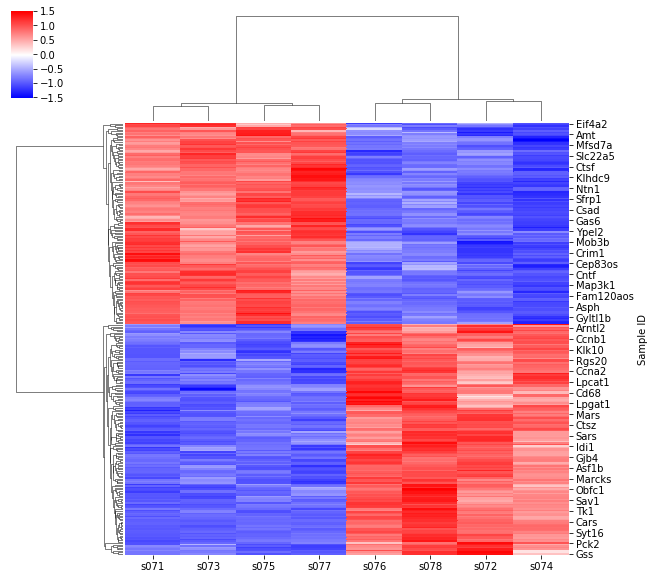

In [614]:
print(len(deg_keepers))
temp_df = untreated_Epi_RPKM.loc[deg_keepers].astype(float)
plt.figure(figsize=[10,10])
sns.clustermap(temp_df,cmap='bwr',z_score=0)
plt.show()

281


<Figure size 720x720 with 0 Axes>

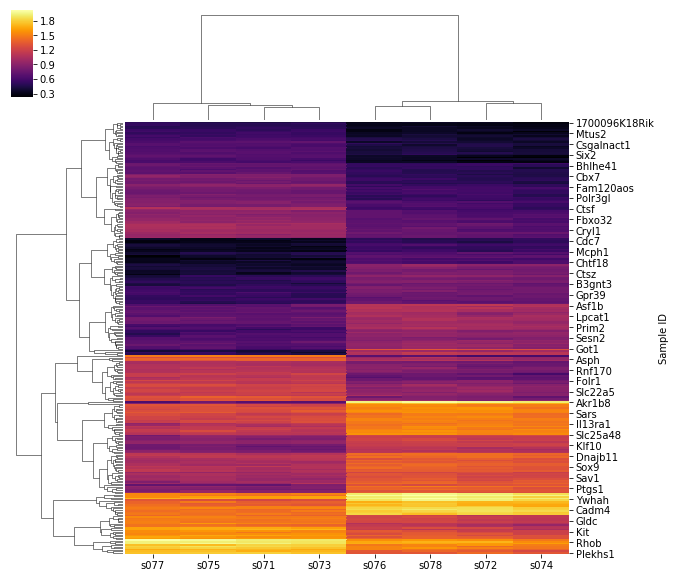

In [615]:
print(len(deg_keepers))
temp_df = untreated_Epi_RPKM.loc[deg_keepers].astype(float)
plt.figure(figsize=[10,10])
sns.clustermap(np.log10(temp_df+1),cmap='inferno')
plt.show()

In [616]:
control_keepers = []
master_std = np.std(unwounded_untreated_Epi_RPKM,axis=1)+np.std(wounded_untreated_Epi_RPKM,axis=1)
avg_untreated_Epi_RPKM = np.mean(untreated_Epi_RPKM,axis=1)
relative_std = master_std/avg_untreated_Epi_RPKM
avg_unwounded_untreated_Epi_RPKM = np.mean(unwounded_untreated_Epi_RPKM,axis=1)
avg_wounded_untreated_Epi_RPKM = np.mean(wounded_untreated_Epi_RPKM,axis=1)
for gene in untreated_Epi_RPKM.index:
    if gene in control_keepers:
        continue
    FPKM1=avg_unwounded_untreated_Epi_RPKM.loc[gene]
    FPKM2=avg_wounded_untreated_Epi_RPKM.loc[gene]
    if FPKM1<10 or FPKM2<10:
        continue
    if FPKM1>50 or FPKM2>50:
        continue
    STD = relative_std.loc[gene]
    if STD>0.15:
        continue
    Fold = abs_Fold_untreated_Epi_RPKM.loc[gene]
    if Fold>np.log10(1.1):
        continue
    Zscore = abs_Zscore_untreated_Epi_RPKM.loc[gene]
    if Zscore>1.1:
        continue
    print('gene:',gene)
    print('FPKM_U:',FPKM1)
    print('FPKM_W:',FPKM2)
    print('STD:',STD)
    print('Fold:',Fold)
    print('Zscore:',Zscore)
    print('')
    control_keepers.append(gene)
print(len(control_keepers))

gene: 2610001J05Rik
FPKM_U: 17.15415
FPKM_W: 16.95905
STD: 0.12515784538071772
Fold: 0.004967682730611669
Zscore: 0.20917340487560726

gene: Abcf3
FPKM_U: 14.1399
FPKM_W: 13.605599999999999
STD: 0.07412852020085314
Fold: 0.016728639357897205
Zscore: 0.9295422782989066

gene: Agpat3
FPKM_U: 33.733975
FPKM_W: 31.07285
STD: 0.13460830455417483
Fold: 0.03568643019534787
Zscore: 0.7923460096639462

gene: Ahcyl1
FPKM_U: 21.7883
FPKM_W: 20.884
STD: 0.14389330358202052
Fold: 0.0184096618424608
Zscore: 0.705556076362534

gene: Anapc2
FPKM_U: 32.535650000000004
FPKM_W: 35.237275000000004
STD: 0.1486642021446688
Fold: 0.03464282826613808
Zscore: 1.0993731385924068

gene: Ap3b1
FPKM_U: 28.852875
FPKM_W: 28.477899999999998
STD: 0.1273347318106199
Fold: 0.005681133582555519
Zscore: 0.20393211875280706

gene: Arfgap3
FPKM_U: 31.172924999999996
FPKM_W: 30.899375
STD: 0.13253290113924965
Fold: 0.0038278595967688126
Zscore: 0.17205688679410489

gene: Arhgap10
FPKM_U: 18.366274999999998
FPKM_W: 17.548975

gene: Leprotl1
FPKM_U: 13.283525000000001
FPKM_W: 13.81095
STD: 0.1470942779619382
Fold: 0.016910215536389113
Zscore: 0.5440600799574171

gene: Lman2
FPKM_U: 30.341099999999997
FPKM_W: 30.394075
STD: 0.11650752568588071
Fold: 0.0007576089478038827
Zscore: 0.025259305783264456

gene: Lrrc41
FPKM_U: 15.411625
FPKM_W: 15.434199999999999
STD: 0.1430783071027859
Fold: 0.0006356905467389312
Zscore: 0.017690687908017515

gene: Lsm14a
FPKM_U: 33.301025
FPKM_W: 33.475875
STD: 0.1329452886137864
Fold: 0.002274336296073687
Zscore: 0.12259386531948045

gene: Luc7l2
FPKM_U: 19.128999999999998
FPKM_W: 18.241225
STD: 0.12727712022747717
Fold: 0.020638266892433334
Zscore: 1.0321655349776626

gene: Lztr1
FPKM_U: 11.895950000000001
FPKM_W: 12.142525
STD: 0.11341121887619554
Fold: 0.008909876176392403
Zscore: 0.439657967289522

gene: Mapk1
FPKM_U: 26.713500000000003
FPKM_W: 27.132625
STD: 0.12863949738395342
Fold: 0.006761019514047568
Zscore: 0.4123161434777706

gene: Mapre1
FPKM_U: 21.689899999999998
FP

gene: Tmed10
FPKM_U: 45.882975
FPKM_W: 48.448274999999995
STD: 0.11346925677042498
Fold: 0.023626749311233267
Zscore: 1.092400327953919

gene: Tmed4
FPKM_U: 14.614424999999999
FPKM_W: 14.2636
STD: 0.127603307132127
Fold: 0.0105525816091321
Zscore: 0.34795423530988745

gene: Tmem115
FPKM_U: 12.0092
FPKM_W: 12.5014
STD: 0.13068658983674802
Fold: 0.017444573685045584
Zscore: 0.592400333816304

gene: Tmem127
FPKM_U: 26.19555
FPKM_W: 25.535475
STD: 0.10144304273741388
Fold: 0.011083580470158734
Zscore: 0.5152872185504235

gene: Tmprss13
FPKM_U: 22.288925
FPKM_W: 22.617475
STD: 0.12809771353877478
Fold: 0.00635499608374977
Zscore: 0.18373505860549624

gene: Tmx2
FPKM_U: 14.497174999999999
FPKM_W: 14.865849999999998
STD: 0.14361486441297197
Fold: 0.01090636490745643
Zscore: 0.4510576908528537

gene: Tnfaip1
FPKM_U: 25.7974
FPKM_W: 26.248749999999998
STD: 0.12173623735279872
Fold: 0.007532688912714751
Zscore: 0.3556767665441751

gene: Tor4a
FPKM_U: 10.92913
FPKM_W: 10.8289125
STD: 0.1489064344

165


<Figure size 720x720 with 0 Axes>

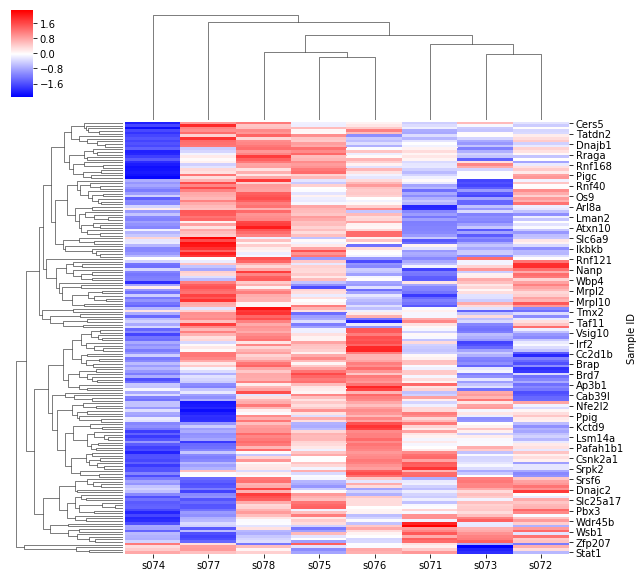

In [617]:
print(len(control_keepers))
temp_df = untreated_Epi_RPKM.loc[control_keepers].astype(float)
plt.figure(figsize=[10,10])
sns.clustermap(np.log10(temp_df+1),cmap='bwr',z_score=0)
plt.show()

165


<Figure size 720x720 with 0 Axes>

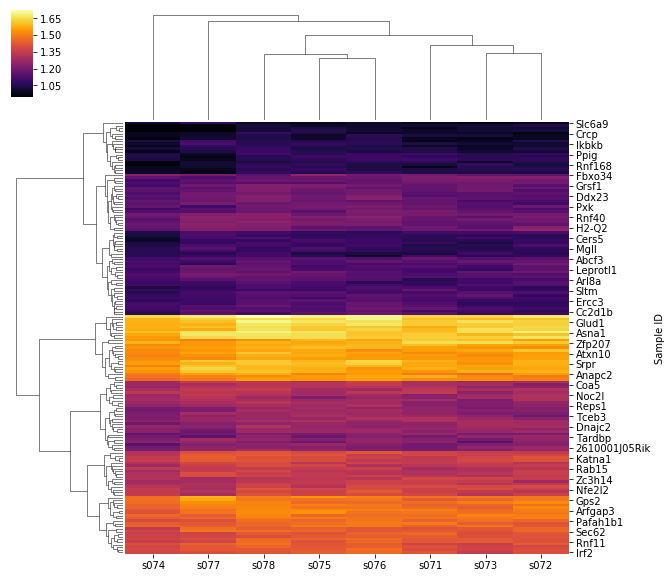

In [618]:
print(len(control_keepers))
temp_df = untreated_Epi_RPKM.loc[control_keepers].astype(float)
plt.figure(figsize=[10,10])
sns.clustermap(np.log10(temp_df),cmap='inferno')
plt.show()

In [620]:
creds = ServiceAccountCredentials.from_json_keyfile_name(path, scope)
client = gspread.authorize(creds)
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
keepers = deg_keepers
keepers.extend(control_keepers)
Gene_Names = expression_worksheet.range('A2:A'+str(len(expression_df)+1))
FPKM = expression_worksheet.range('C2:C'+str(len(expression_df)+1))
FPKM_unwounded = expression_worksheet.range('M2:M'+str(len(expression_df)+1))
FPKM_wounded = expression_worksheet.range('N2:N'+str(len(expression_df)+1))
Zscore = expression_worksheet.range('O2:O'+str(len(expression_df)+1))
Fold = expression_worksheet.range('L2:L'+str(len(expression_df)+1))
completed = []
for i,gene in enumerate(Gene_Names):
    if i>len(keepers):
        Gene_Names[i].value = ''
        FPKM[i].value = ''
        FPKM_unwounded[i].value = ''
        FPKM_wounded[i].value = ''
        Zscore[i].value = ''
        Fold[i].value = ''
    gene = keepers[i]
    if gene in completed:
        continue
    completed.append(gene)
    Gene_Names[i].value = gene
    FPKM[i].value = avg_untreated_Epi_RPKM.loc[gene]
    FPKM_unwounded[i].value = avg_unwounded_untreated_Epi_RPKM.loc[gene]
    FPKM_wounded[i].value = avg_wounded_untreated_Epi_RPKM.loc[gene]
    Zscore[i].value = Zscore_untreated_Epi_RPKM.loc[gene]
    Fold[i].value = 10**abs_Fold_untreated_Epi_RPKM.loc[gene]
expression_worksheet.update_cells(Gene_Names)
expression_worksheet.update_cells(FPKM)
expression_worksheet.update_cells(FPKM_unwounded)
expression_worksheet.update_cells(FPKM_wounded)
expression_worksheet.update_cells(Zscore)
expression_worksheet.update_cells(Fold)

INFO:oauth2client.client:Refreshing access_token


{'spreadsheetId': '1Zspsy-9_vOxyFrZoWOmTVVML2Uujvb_djib2la4oKHc',
 'updatedRange': 'Sheet1!L2:L447',
 'updatedRows': 446,
 'updatedColumns': 1,
 'updatedCells': 446}

In [231]:
gene = control_keepers[1]
print(gene,':',Zscore_untreated_Epi_RPKM.loc[gene])
print(gene,':',Fold_untreated_Epi_RPKM.loc[gene])
gene = deg_keepers[1]
print(gene,':',Zscore_untreated_Epi_RPKM.loc[gene])
print(gene,':',Fold_untreated_Epi_RPKM.loc[gene])

1700063D05Rik : 0.0032536021325433317
1700063D05Rik : 1.0009095126317813
Aaas : 10.169614092327045
Aaas : 2.2609211621529735


In [191]:
Zscore_untreated_Epi_RPKM = (np.mean(wounded_untreated_Epi_RPKM,axis=1)-np.mean(unwounded_untreated_Epi_RPKM,axis=1))/np.std(unwounded_untreated_Epi_RPKM,axis=1)
avg_untreated_Epi_RPKM = np.mean(untreated_Epi_RPKM,axis=1)
keepers = []
for gene in Zscore_untreated_Epi_RPKM.index:
    if avg_untreated_Epi_RPKM.loc[gene]>1:
        if avg_untreated_Epi_RPKM.loc[gene]<100:
            keepers.append(gene)
Zscore_untreated_Epi_RPKM = Zscore_untreated_Epi_RPKM.loc[wounded_untreated_Epi_RPKM[(np.mean(wounded_untreated_Epi_RPKM,axis=1)>10)].index]
Zscore_untreated_Epi_RPKM = Zscore_untreated_Epi_RPKM.loc[keepers]
abs_Zscore_untreated_Epi_RPKM = np.abs(Zscore_untreated_Epi_RPKM).sort_values()
control_keepers = list(Zscore_untreated_Epi_RPKM[abs_Zscore_untreated_Epi_RPKM<0.1].index)
deg_keepers = list(Zscore_untreated_Epi_RPKM[abs_Zscore_untreated_Epi_RPKM>10].index)
print('control genes:',len(control_keepers))
print('deg genes:',len(deg_keepers))

control genes: 164
deg genes: 268


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


In [192]:
gene = deg_keepers[0]
print(gene,':',Zscore_untreated_Epi_RPKM.loc[gene])
print(gene,':',Zscore_untreated_Epi_RPKM.loc[gene])
untreated_Epi_RPKM.loc[gene]

2810403A07Rik : -13.688828067537052


s071    14.0682
s073    14.1324
s075    13.8856
s077    13.7439
s072    12.2196
s074    10.4416
s076    12.5334
s078    12.2578
Name: 2810403A07Rik, dtype: object

In [161]:
FPKM_mean_df = np.mean(untreated_Epi_RPKM,axis=1)
FPKM_wounded_df = np.mean(wounded_untreated_Epi_RPKM,axis=1)
FPKM_unwounded_df = np.mean(unwounded_untreated_Epi_RPKM,axis=1)
Zscore_untreated_Epi_RPKM = (np.mean(wounded_untreated_Epi_RPKM,axis=1)-np.mean(unwounded_untreated_Epi_RPKM,axis=1))/np.std(unwounded_untreated_Epi_RPKM,axis=1)


In [162]:
Gene_Names = expression_worksheet.range('A2:A'+str(len(keepers)+1))
FPKM = expression_worksheet.range('C2:C'+str(len(keepers)+1))
FPKM_unwounded = expression_worksheet.range('M2:M'+str(len(keepers)+1))
FPKM_wounded = expression_worksheet.range('N2:N'+str(len(keepers)+1))
Zscore = expression_worksheet.range('O2:O'+str(len(keepers)+1))
for i,gene in enumerate(keepers):
    Gene_Names[i].value = gene
    FPKM[i].value = FPKM_mean_df.loc[gene]
    FPKM_unwounded[i].value = FPKM_wounded_df.loc[gene]
    FPKM_wounded[i].value = FPKM_unwounded_df.loc[gene]
    Zscore[i].value = Zscore_untreated_Epi_RPKM.loc[gene]
expression_worksheet.update_cells(Gene_Names)
expression_worksheet.update_cells(FPKM)
expression_worksheet.update_cells(FPKM_unwounded)
expression_worksheet.update_cells(FPKM_wounded)
expression_worksheet.update_cells(Zscore)

{'spreadsheetId': '1Zspsy-9_vOxyFrZoWOmTVVML2Uujvb_djib2la4oKHc',
 'updatedRange': 'Sheet1!O2:O633',
 'updatedRows': 632,
 'updatedColumns': 1,
 'updatedCells': 632}

In [622]:
biomart_download_fname_path = '/bigstore/binfo/mouse/mouse_mart_export.txt'
expression_path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/MERFISH_analysis-master/mouse/Zach/Cornea/Expression/no_versions_isoforms_tracking.csv'
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
FPKM_df = pd.read_csv(open(expression_path, 'r'))
transcript_df = pd.read_csv(open(biomart_download_fname_path, 'r'))
Transcript_IDs = expression_worksheet.range('G2:G'+str(len(expression_df)+1))
Gene_IDs = expression_worksheet.range('F2:F'+str(len(expression_df)+1))
FPKMs = expression_worksheet.range('C2:C'+str(len(expression_df)+1))
lengths = expression_worksheet.range('D2:D'+str(len(expression_df)+1))
Descriptions = expression_worksheet.range('B2:B'+str(len(expression_df)+1))
Genes = expression_worksheet.range('A2:A'+str(len(expression_df)+1))
Isoforms = expression_worksheet.range('I2:I'+str(len(expression_df)+1))
Type = expression_worksheet.range('J2:J'+str(len(expression_df)+1))

flag = 'gene'
FPKM_gene_name_col = 'gene_short_name'
FPKM_gid_col = 'gene_id'
FPKM_tid_col = 'transcript_id'
FPKM_length_col = 'length'
FPKM_FPKM_col = 'FPKM'
tid_col = 'Transcript stable ID'
gid_col = 'Gene stable ID'
ttype_col = 'Transcript type'
gene_name_col = 'Gene name'
gene_description_col = 'Gene description'

completed = []
for i,cell in enumerate(Genes):
    gene = cell.value
    if gene == '':
        continue
    if gene in completed:
        Type[i].value= 'duplicate'
        print(gene,' duplicated')
    if flag=='gene':
        gid = FPKM_df[FPKM_df[FPKM_gene_name_col] == gene][FPKM_gid_col].unique()
        try:
            if len(gid)==0:
                gid = FPKM_df[FPKM_df[FPKM_gene_name_col] == gene.capitalize()][FPKM_gid_col].unique()
        except:
            pass
        try:
            if len(gid)==0:
                gid = FPKM_df[FPKM_df[FPKM_gene_name_col] == gene.upper()][FPKM_gid_col].unique()
        except:
            pass
    elif flag == 'gid':
        gid = gene
    elif flag == 'tid':
        gid = FPKM_df[FPKM_df[FPKM_tid_col] == gene.split('.')[0]][FPKM_gid_col].unique()
        master_tid = gene.split('.')[0]
    else:
        print('flag is wrong')
    if isinstance(gid,list):
        if len(gid)==0:
            print('gid not found for ',gene,gid)
            continue
        gid = gid[0]
    elif isinstance(gid,np.ndarray):
        if len(gid)==0:
            print('gid not found for ',gene,gid)
            continue
        gid = gid[0]
    else:
        print('gid not found for ',gene)
        continue
    gene_FPKM_df = FPKM_df[FPKM_df[FPKM_gid_col] == gid].drop_duplicates(FPKM_tid_col)
    gene_FPKM_df = gene_FPKM_df.sort_values(FPKM_length_col, ascending=False)
    gene_FPKM_df = gene_FPKM_df.sort_values(FPKM_FPKM_col, ascending=False)
    if len(gene_FPKM_df)==0:
        print('Failed finding: ', gid)
        continue
    tids = [i for i in gene_FPKM_df[FPKM_tid_col] if i != '']
    transcripts = transcript_df[transcript_df[tid_col].isin(tids)]
    transcripts = transcripts[transcripts[ttype_col]=='protein_coding']
    expression = []
    length = []
    for tid in transcripts[tid_col]:
        expression.append(gene_FPKM_df[gene_FPKM_df[FPKM_tid_col]==tid][FPKM_FPKM_col].iloc[0])
        length.append(gene_FPKM_df[gene_FPKM_df[FPKM_tid_col]==tid][FPKM_length_col].iloc[0])
    transcripts[FPKM_FPKM_col]=expression
    transcripts[FPKM_length_col]=length
    transcripts = transcripts.sort_values(FPKM_FPKM_col, ascending=False)
#         tsls = ['tsl1','tsl2','tsl3']
#         final_transcripts = transcripts[transcripts['Transcript support level (TSL)'].isin(tsls)]
#         if len(final_transcripts)>0:
#             transcripts = final_transcripts
    if flag =='tid':
        transcripts = transcripts[transcripts[tid_col]==master_tid]
    if len(transcripts)==0:
        print('Failed finding ', gene)
        continue
    tid = str(transcripts[tid_col].iloc[0])
    Transcript_IDs[i].value = tid
    Gene_IDs[i].value = str(transcripts[gid_col].iloc[0])
    fpkm = transcripts[FPKM_FPKM_col].iloc[0]
    FPKMs[i].value = transcripts[FPKM_FPKM_col].iloc[0]
    lengths[i].value = int(transcripts[FPKM_length_col].iloc[0])
    Descriptions[i].value = str(transcripts[gene_description_col].iloc[0])
    Genes[i].value = str(transcripts[gene_name_col].iloc[0])
    I = gene_FPKM_df[gene_FPKM_df[FPKM_tid_col]==tid][FPKM_FPKM_col].iloc[0]/np.sum(gene_FPKM_df[FPKM_FPKM_col])
    if fpkm==0:
        I = 0
    Isoforms[i].value = I
    completed.append(gene)
expression_worksheet.update_cells(Transcript_IDs)
expression_worksheet.update_cells(FPKMs)
expression_worksheet.update_cells(lengths)
expression_worksheet.update_cells(Descriptions)
#expression_worksheet.update_cells(Genes)
expression_worksheet.update_cells(Gene_IDs)
expression_worksheet.update_cells(Isoforms)
expression_worksheet.update_cells(Type)

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in double_scalars


Failed finding  Cep83os
Failed finding  Fam120aos
gid not found for  Gm16845 []
Failed finding  Firre
gid not found for  5730409E04Rik []
gid not found for  2810013P06Rik []
gid not found for  1700096K18Rik []
gid not found for  Tceb3 []
gid not found for  2610001J05Rik []
gid not found for  Gm5643 []
gid not found for  Ppapdc1b []
gid not found for  Obfc1 []
gid not found for  Hn1l []
gid not found for  Slc7a5 []
gid not found for  D17H6S56E-5 []
gid not found for  Cdt1 []
gid not found for  A130010J15Rik []


{'spreadsheetId': '1Zspsy-9_vOxyFrZoWOmTVVML2Uujvb_djib2la4oKHc',
 'updatedRange': 'Sheet1!J2:J447',
 'updatedRows': 446,
 'updatedColumns': 1,
 'updatedCells': 446}

In [13]:
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
expression_df
Status = expression_worksheet.range('J2:J'+str(len(expression_df)+1))
Genes = expression_worksheet.range('A2:A'+str(len(expression_df)+1))
completed = []
for i,cell in enumerate(Genes):
    gene = cell.value
    if gene in completed:
        Status[i].value = 'Duplicate'
    else:
        Status[i].value = 'Passed'
        completed.append(gene)
expression_worksheet.update_cells(Status)

{'spreadsheetId': '1Zspsy-9_vOxyFrZoWOmTVVML2Uujvb_djib2la4oKHc',
 'updatedRange': 'Sheet1!J2:J187',
 'updatedRows': 186,
 'updatedColumns': 1,
 'updatedCells': 186}

In [6]:
import random
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
expression_df
barcodes = pd.read_csv('/home/zach/PythonRepos/PySpots/hybescope_config/MHD4_18bit_187cwords.csv',header=None)
# del fpkm
fpkm = expression_df.FPKM.copy()
fpkm.index = expression_df.Gene
i=0
while len(fpkm)<len(barcodes):
    key = 'blank_'+str(i)
    fpkm[key] = 0*fpkm.iloc[0]
    i+=1
fpkm = pd.DataFrame(fpkm)
fpkm = fpkm.sort_index()
genes = list(fpkm.index)
s = 0
std = 10**6
while s==0:
    temp_barcodes = barcodes.copy()
    temp_barcodes.index = random.sample(genes,len(genes))
    temp_barcodes = temp_barcodes.sort_index()
    temp_fpkm = list(fpkm['FPKM'])
    fpkm_barcodes = temp_barcodes.copy()
    for i in fpkm_barcodes.columns:
        fpkm_barcodes[i] = fpkm_barcodes[i]*temp_fpkm
    temp_std = np.max(np.sum(fpkm_barcodes,axis=0))
    if temp_std<std:
        std = temp_std
        print(round(std,2),round(np.std(np.sum(fpkm_barcodes,axis=0)),2))
        master_barcodes = temp_barcodes.copy()

618.09 65.54
504.27 49.35
462.71 47.31
459.9 49.38
456.98 47.9
446.73 35.01


KeyboardInterrupt: 

In [7]:
temp_barcodes = master_barcodes.copy()
temp_fpkm = list(fpkm['FPKM'])
fpkm_barcodes = temp_barcodes.copy()
for i in fpkm_barcodes.columns:
    fpkm_barcodes[i] = fpkm_barcodes[i]*temp_fpkm
np.sum(fpkm_barcodes,axis=0)

0     410.85
1     384.04
2     408.23
3     421.13
4     446.73
5     344.05
6     331.73
7     417.67
8     415.70
9     439.49
10    426.67
11    440.81
12    395.31
13    337.11
14    403.62
15    417.13
16    433.39
17    362.86
dtype: float64

In [8]:
Barcodes = expression_worksheet.range('H2:H'+str(len(master_barcodes)+1))
Genes = expression_worksheet.range('A2:A'+str(len(master_barcodes)+1))
b = 0
for i,cell in enumerate(Genes):
    gene = cell.value
    if gene=='':
        continue
    Barcodes[i].value = ''.join(str(i) for i in master_barcodes.loc[gene])
expression_worksheet.update_cells(Barcodes)

{'spreadsheetId': '1Zspsy-9_vOxyFrZoWOmTVVML2Uujvb_djib2la4oKHc',
 'updatedRange': 'Sheet1!H2:H188',
 'updatedRows': 187,
 'updatedColumns': 1,
 'updatedCells': 187}

In [9]:
# readout_names = ['1009169.0','458122.0','218057.0','275708.0','756916.0',
#                  '638557.0','285692.0','719418.0','516032.0','432678.0',
#                  '135628.0','184948.0','471571.0','942696.0','1074935.0',
#                  '760360.0','1095367.0','428400.0','655176.0','202915.0']
# readout_names = ['RS0095_cy5','RS0109_cy5','RS0175_cy5','RS0237_cy5','RS0307_cy5',
#                  'RS0332_cy5','RS0384_atto565','RS0406_atto565','RS0451_atto565',
#                  'RS0468_atto565','RS0548_atto565','RS64.0_atto565','RSN9927.0_cy5',
#                  'RSN2336.0_cy5','RSN1807.0_cy5','RSN4287.0_atto565','RSN1252.0_atto565',
#                  'RSN9535.0_atto565']
f = '/bigstore/binfo/mouse/disulfide_readouts.fasta'
from Bio import SeqIO
readout_names = []
with open(f) as fasta_file:  # Will close handle cleanly
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        readout_names.append(seq_record.name)
print(readout_names)
def write_codebook(rows, fname, readout_names, codebook_style = '148MHD4'):
    with open(fname, 'w') as f:
        f.write('version'+','+str(1)+'\n')
        f.write('codebook_name'+','+codebook_style+'\n')
        f.write('bit_names,'+','.join(readout_names)+'\n')
        f.write('name, id, barcode\n')
        for row in rows:
            f.write(','.join([str(row[0]), str(row[1]), str(row[2])+'\n']))
# Generate Codebook
row_tuples = []
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
for idx, row in expression_df.drop_duplicates('Transcript_ID').iterrows():
    if len(row['Transcript_ID'].split('.')[0])>0:
        #row_tuples.append((row['Gene'], row['Transcript_ID'].split('.')[0], str(row['Barcode']).zfill(18)))
        row_tuples.append((row['Gene'], row['Transcript_ID'].split('.')[0], str('111000000000000001').zfill(18)))
base = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/Epithelium'
if not os.path.exists(base):
    os.mkdir(base)
write_codebook(row_tuples, os.path.join(base,'Codebook_Final.txt'), readout_names)
row_tuples

['RS0095', 'RS0109', 'RS0175', 'RS0237', 'RS0307', 'RS0332', 'RS0384', 'RS0406', 'RS0451', 'RS0468', 'RS0548', 'RS64.0', 'RS156.0', 'RS278.0', 'RS313.0', 'RS643.0', 'RS740.0', 'RS810.0']


[('Ptgs1', 'ENSMUST00000062069', '111000000000000001'),
 ('Nars', 'ENSMUST00000025483', '111000000000000001'),
 ('Nfe2l2', 'ENSMUST00000102672', '111000000000000001'),
 ('Gba', 'ENSMUST00000077367', '111000000000000001'),
 ('Stom', 'ENSMUST00000028241', '111000000000000001'),
 ('Jak1', 'ENSMUST00000102781', '111000000000000001'),
 ('Lman2', 'ENSMUST00000021940', '111000000000000001'),
 ('Mat2a', 'ENSMUST00000059472', '111000000000000001'),
 ('Gng12', 'ENSMUST00000043148', '111000000000000001'),
 ('Tspyl1', 'ENSMUST00000061372', '111000000000000001'),
 ('Srpr', 'ENSMUST00000034541', '111000000000000001'),
 ('St6gal1', 'ENSMUST00000178797', '111000000000000001'),
 ('Slc17a5', 'ENSMUST00000052441', '111000000000000001'),
 ('Noc2l', 'ENSMUST00000179543', '111000000000000001'),
 ('Icam1', 'ENSMUST00000086399', '111000000000000001'),
 ('Timp2', 'ENSMUST00000017610', '111000000000000001'),
 ('Slc31a1', 'ENSMUST00000084526', '111000000000000001'),
 ('Atxn10', 'ENSMUST00000163242', '11100000000

In [16]:
# Parse Fasta
base = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/Epithelium'
f = os.path.join(base,'Final_Pass','Wound_Response_oligos.fasta')
from Bio import SeqIO
with open(f) as fasta_file:  # Will close handle cleanly
    gene = []
    gid = []
    seqs = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        name = seq_record.description.split(' ')
        seqs.append(str(seq_record.seq))
        for i in name:
            if 'ENS' in i:
                gene.append(i.split('_')[0])
                gid.append(i.split('_')[2])
fasta = pd.DataFrame(columns = ['gene','gene_ID','sequence'])
fasta['gene'] = gene
fasta['gene_ID'] = gid
fasta['sequence'] = seqs
fasta

,gene,gene_ID,sequence
0,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCATGAAAGGAATGGGTTGTGGTAGGATG...
1,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCATGAAAGGAATGGGTTGTGGTAGAGTG...
2,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCAAGAGTGAGTAGTAGTGGAGTAGAGTG...
3,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCAAGAGTGAGTAGTAGTGGAGTATGAAA...
4,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCATGAAAGGAATGGGTTGTGGTAAGAGT...
5,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCATGTGATGGAAGTTAGAGGGTAGAACT...
6,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCAAGAGTGAGTAGTAGTGGAGTATTGGT...
7,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCAGAGTGTGTGTTAAGGTAGGTATGTGA...
8,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCAGAGTGTGTGTTAAGGTAGGTATGTGA...
9,Ptgs1,ENSMUST00000062069,AGTCGGCGTAGCATCTCCCATGTGATGGAAGTTAGAGGGTAAGAGT...


In [17]:
expression_worksheet = client.open("Wound_Response").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)

gene_name = expression_worksheet.range('A2:A'+str(len(expression_df)+1))
oligos = expression_worksheet.range('E2:E'+str(len(expression_df)+1))
for i,gene in enumerate(gene_name):
    gene = gene.value
    if len(gene)>0:
        oligos[i].value = len(fasta[fasta['gene']==gene])
expression_worksheet.update_cells(oligos)

{'spreadsheetId': '1Zspsy-9_vOxyFrZoWOmTVVML2Uujvb_djib2la4oKHc',
 'updatedRange': 'Sheet1!E2:E187',
 'updatedRows': 186,
 'updatedColumns': 1,
 'updatedCells': 186}

In [2]:
f = '/bigstore/GeneralStorage/Zach/MERFISH/cell_cycle_Tirosh2015.xlsx'
cell_cycle_df = pd.read_excel(f)
cell_cycle_df.index = cell_cycle_df['Symbol']
keep_cols = ['Early G1','Late G1','S','G2/M']
cell_cycle_z = (cell_cycle_df[keep_cols]-np.mean(cell_cycle_df[keep_cols],axis=0))/np.std(cell_cycle_df[keep_cols],axis=0)
for column in cell_cycle_z.columns:
    col_name = 'Z_'+column
    cell_cycle_df[col_name] = cell_cycle_z[column]

,Symbol,UCSC transcripts,Significant populations,Early G1,Late G1,S,G2/M,Z_Early G1,Z_Late G1,Z_S,Z_G2/M
Symbol,,,,,,,,,,,
NaN,NaN,"'uc008stp.1,uc008stq.1,uc012ddr.1'",4,1.174568,0.387289,0.958305,0.797759,0.329581,-0.811572,-0.636661,-0.631791
Lsm10,Lsm10,"'uc008usk.2,uc012dlb.1'",2,0.910408,0.847573,0.099923,0.381764,0.037644,-0.429975,-1.197234,-0.946116
Itga2b,Itga2b,"'uc007lrx.2,uc007lry.2,uc007lrz.1,uc007lsa.1'",3,0.990586,0.791526,0.119766,0.286993,0.126253,-0.476441,-1.184276,-1.017726
Mavs,Mavs,"'uc008mld.1,uc008mle.1,uc008mlf.1'",4,1.656557,0.708190,1.001107,0.657129,0.862251,-0.545530,-0.608709,-0.738050
Cnot2,Cnot2,"'uc007hca.2,uc007hcb.2,uc007hcc.2,uc007hcd.2,u...",2,1.146358,0.791173,-0.072740,1.028570,0.298405,-0.476734,-1.309993,-0.457389
Pttg1ip,Pttg1ip,'uc007fvx.1',2,1.310732,0.194311,0.191707,1.004011,0.480062,-0.971560,-1.137294,-0.475946
Pgrmc1,Pgrmc1,'uc009sxo.1',2,1.673315,0.847345,1.340664,0.983302,0.880771,-0.430164,-0.386958,-0.491594
Rabepk,Rabepk,"'uc008jiu.1,uc008jiv.1'",3,1.514819,1.169226,1.065608,1.221047,0.705609,-0.163310,-0.566586,-0.311953
Morf4l1,Morf4l1,"'uc009qzw.2,uc009qzx.2,uc009qzy.1,uc009qzz.2'",2,1.116734,0.850218,0.963289,0.157232,0.265665,-0.427782,-0.633406,-1.115773


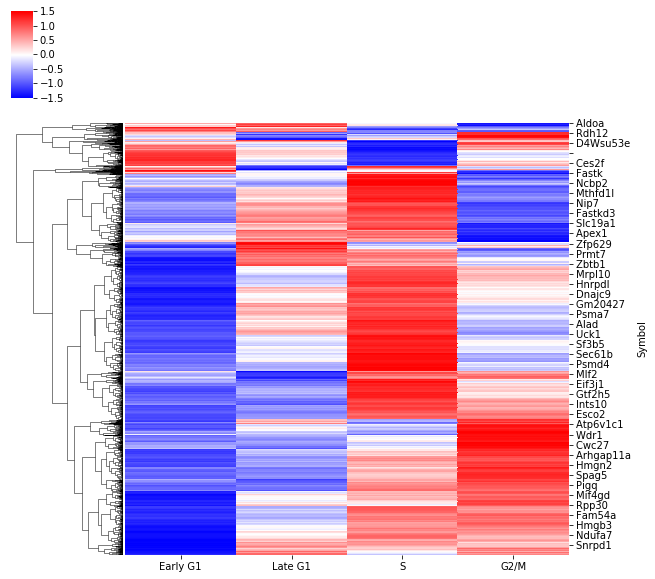

In [5]:
keep_col = ['Early G1','Late G1','S','G2/M']
sns.clustermap(cell_cycle_df[keep_col],center=0,cmap='bwr',col_cluster=False,z_score=0)

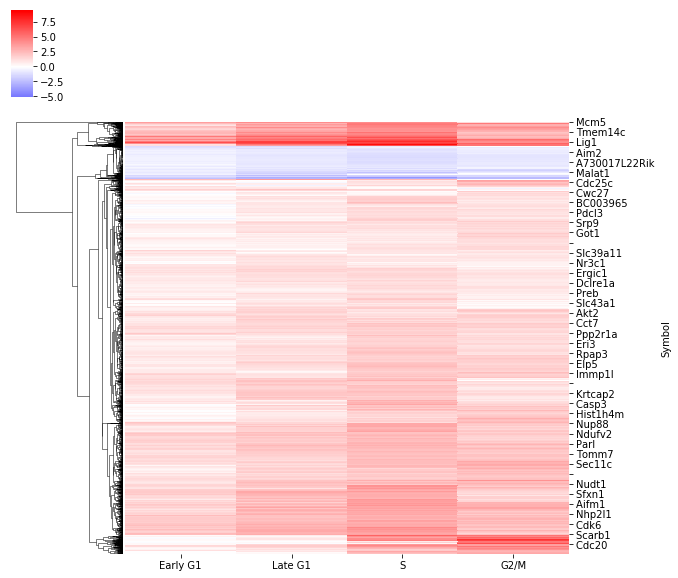

In [6]:
keep_col = ['Early G1','Late G1','S','G2/M']
sns.clustermap(cell_cycle_df[keep_col],center=0,cmap='bwr',col_cluster=False)

In [7]:
col = ['Early G1','Late G1','S','G2/M']
G1S_col = ['Early G1','Late G1','S']
G2M_col = ['G2/M']
G1S_ave = pd.DataFrame(np.mean(cell_cycle_df[G1S_col],axis=1))
G2M_ave = pd.DataFrame(np.mean(cell_cycle_df[G2M_col],axis=1))
std = pd.DataFrame(np.std(cell_cycle_df[col],axis=1))
G2M_Z = pd.DataFrame((G2M_ave-G1S_ave)/std)
G1S_Z = pd.DataFrame((G1S_ave-G2M_ave)/std)

In [8]:
col = ['Early G1','Late G1','S','G2/M']
G1_col = ['Early G1','Late G1']
S_col = ['S']
G2M_col = ['G2/M']
G1_ave = pd.DataFrame(np.mean(cell_cycle_df[G1_col],axis=1))
S_ave = pd.DataFrame(np.mean(cell_cycle_df[S_col],axis=1))
G2M_ave = pd.DataFrame(np.mean(cell_cycle_df[G2M_col],axis=1))
ave = pd.DataFrame(np.mean(cell_cycle_df[col],axis=1))
std = pd.DataFrame(np.std(cell_cycle_df[col],axis=1))
G2M_Z = pd.DataFrame((G2M_ave-ave)/std)
G1_Z = pd.DataFrame((G1_ave-ave)/std)
S_Z = pd.DataFrame((S_ave-ave)/std)

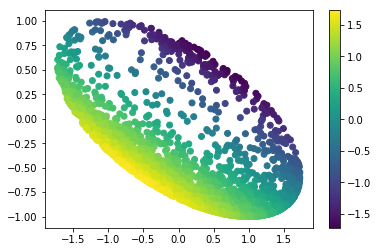

In [9]:
plt.scatter(G2M_Z,G1_Z,c=S_Z)
plt.colorbar()
plt.show()

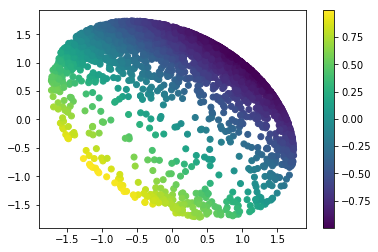

In [10]:
plt.scatter(G2M_Z,S_Z,c=G1_Z)
plt.colorbar()
plt.show()

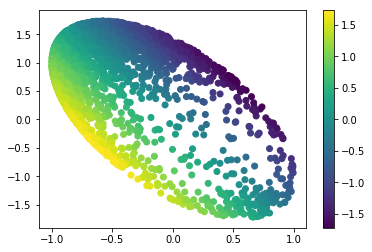

In [11]:
plt.scatter(G1_Z,S_Z,c=G2M_Z)
plt.colorbar()
plt.show()

In [12]:
import plotly.express as px
iris = px.data.iris()
# fig = px.scatter_3d()

In [21]:
Z_DF = pd.DataFrame(index=G1_Z.index)
Z_DF['G1_Z']= G1_Z
Z_DF['G2M_Z']= G2M_Z
Z_DF['S_Z']= S_Z
Z_DF['size']= 0.5
Z_DF['alpha']= 0.5
fig = px.scatter_3d(Z_DF,x='G1_Z',y='G2M_Z',z='S_Z',size='size')
fig.show()

In [22]:
G1_Z_list = []
G2M_lsit = []

for gene,row in Z_DF.iterrows():
    if row['G1_Z']/row['G2M_Z']>thresh:
        if row['G1_Z']/row['S_Z']>thresh:
            G1_Z.append(gene)
    if row['G2M_Z']/row['G1_Z']>thresh:
        if row['G2M_Z']/row['S_Z']>thresh:
            G1_Z.append(gene)
    if row['S_Z']/row['G2M_Z']>thresh:
        if row['S_Z']/row['G1_Z']>thresh:
            A.append(gene)

nan
Lsm10 
Itga2b 
Mavs 
Cnot2 
Pttg1ip 
Pgrmc1 
Rabepk 
Morf4l1 
Fahd1 
Xrcc5 
Cdadc1 
Ubash3a 
Akr1b3 
Tnfrsf18 
Gtf2h4 
Hdac10 
Itgb1 
Ltc4s 
Abhd11 
Cct5 
Nmd3 
Polr2h 
Rpl22l1 
Mrfap1 
 
Smad2 
Lass5 
Ipo4 
Cdca7 
 
Mcm4 
Mcm2 
Mcm3 
Fubp1 
 
Il27ra 
Bzw2 
Zfp422 
Abcf2 
 
Rfc2 
Amd1 
Psma5 
Eif2s1 
Nono 
Mki67ip 
B4galnt1 
Tmem134 
Ninj1 
Polr2f 
Mrpl54 
Mrps7 
Rpl7l1 
Hmga1 
Ndufv2 
Nop56 
Snx5 
Spag7 
Inpp5f 
Ncf4 
Eif3a 
Tars 
Bad 
Ndufaf4 
Ung 
Slco4a1 
Lyn 
Wdr12 
Prkdc 
Tmem97 
 
Zdhhc12 
Pdia6 
Usp37 
Got2 
Cdk2 
Drg1 
Usp10 
Cdca7l 
Pfkl 
Imp4 
Zfyve21 
Cct8 
Yars 
Mcmbp 
Tubgcp2 
Ltv1 
Fasn 
Cd3eap 
Slc38a2 
Mat2a 
Gins1 
Aldh18a1 
Ciapin1 
Dus3l 
Manf 
Mbd3 
Dnaja1 
Kars 
Mtf2 
Zfp629 
Clns1a 
Gpatch4 
Nr2c2ap 
Pdcd2l 
Srsf7 
Pusl1 
Ccdc90b 
Ccdc86 
Zhx1 
Gmps 
Nap1l4 
Ldha 
Xist 
Pycrl 
Bax 
Ubtf 
Prps1l3 
Flna 
Fam173a 
Pdia4 
Setdb1 
Ctnnbl1 
Hars 
Ccdc101 
Pnn 
Fyttd1 
Sars 
Eif4a1 
Gcfc1 
Ing5 
Tti1 
Azin1 
Timm17a 
Dhx15 
Tsta3 
Rasgrp2 
Eif4ebp1 
Topbp1 
Tpt1 
Ak

Naa40 
Haus8 
Tpm1 
Fastkd2 
Rpf1 
Mak16 
Rars2 
Oip5 
Cldn25 
Mina 
Egfl7 
Elmo2 
Metap2 
Hexa 
Sssca1 
 
Fancg 
Gnb1l 
Paox 
Pkig 
Cct4 
 
Chtf18 
Bag5 
Pop7 
Fanci 
Gng10 
Pmm1 
Npm1 
Ddb2 
Npepl1 
Gpx4 
Tmem11 
Tonsl 
Dnajb11 
Sumo2 
Zdhhc16 
Brca1 
Hnrnpab 
Gm20427 
Znhit3 
Xrcc3 
Exosc3 
Casp3 
Nup155 
Aup1 
 
Ercc6l 
Fxc1 
Bcl2l12 
Fam105a 
Abcf1 
Pgm2 
 
Gadd45gip1 
Gins3 
Mrps22 
Csda 
Etf1 
Emc6 
 
Ybx1 
Rrp1 
Carkd 
Rgs10 
Mtbp 
Ethe1 
Cmah 
Ndufs4 
Tma16 
Cep152 
 
Polr2i 
Klk8 
Haghl 
Ccnd3 
Cklf 
Lsm12 
Pcyt2 
Nup133 
Tmed2 
Cmc1 
Thap7 
Tfg 
Rps15 
Timm9 
Fkbp11 
Ogdh 
Hirip3 
Wrap53 
Cnp 
Pnkd 
 
Setdb2 
Nif3l1 
 
Trim37 
Rbbp5 
Decr1 
Slc31a1 
 
 
Ppp1cb 
Srsf1 
Ddt 
Dars2 
Pdss1 
 
Slc25a10 
Ccdc69 
Snapc5 
Qrich1 
Qtrtd1 
Mettl1 
Srfbp1 
Pycard 
Eri3 
Gcat 
Zranb2 
Tbc1d15 
Ppp1r8 
Mum1 
 
Mrpl10 
Ptma 
Ddx27 
 
Mycbp 
Mlf1ip 
Mns1 
Apoa1bp 
Stag2 
Hdlbp 
E2f8 
Uba1 
Trub2 
Ncln 
Mrpl13 
Aurkb 
Nfx1 
Cenpo 
Utp3 
Tmem205 
AI413582 
Sass6 
Apmap 
Psmb4 
Snrnp27 
l7Rn6

In [105]:
pos_thresh = 0.75
neg_thresh = 0
G1_df = Z_DF[(Z_DF['G1_Z']>pos_thresh)&(Z_DF['G2M_Z']<neg_thresh)&(Z_DF['S_Z']<neg_thresh)]
pos_thresh = 0.75
neg_thresh = -0.3
G2M_df = Z_DF[(Z_DF['G2M_Z']>pos_thresh)&(Z_DF['G1_Z']<neg_thresh)&(Z_DF['S_Z']<neg_thresh)]
pos_thresh = 0.75
neg_thresh = -0.45
S_df = Z_DF[(Z_DF['S_Z']>pos_thresh)&(Z_DF['G2M_Z']<neg_thresh)&(Z_DF['G1_Z']<neg_thresh)]
print('G1_df',len(G1_df))
print('G2M_df',len(G2M_df))
print('S_df',len(S_df))

G1_df 81
G2M_df 99
S_df 104


In [106]:
mask = []
index = []
color = []
label = []
n = 100
for i,gene in enumerate(Z_DF.index):
    if gene==Z_DF.iloc[25].name:
        mask.append(False)
        continue
    if not gene in G1_df.iloc[0:n].index:
        if not gene in G2M_df.iloc[0:n].index:
            if not gene in S_df.iloc[0:n].index:
                mask.append(False)
                continue
            else:
                color.append('r')
                label.append('S')
        else:
            color.append('b')
            label.append('G2M')
    else:
        color.append('g')
        label.append('G1')
    mask.append(True)
    index.append(gene)
keepers_DF = Z_DF[mask]
keepers_DF.index=index
keepers_DF['color'] = color
keepers_DF['label'] = label

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [107]:
fig = px.scatter_3d(keepers_DF,x='G1_Z',y='G2M_Z',z='S_Z',color='color',symbol='label')
fig.show()

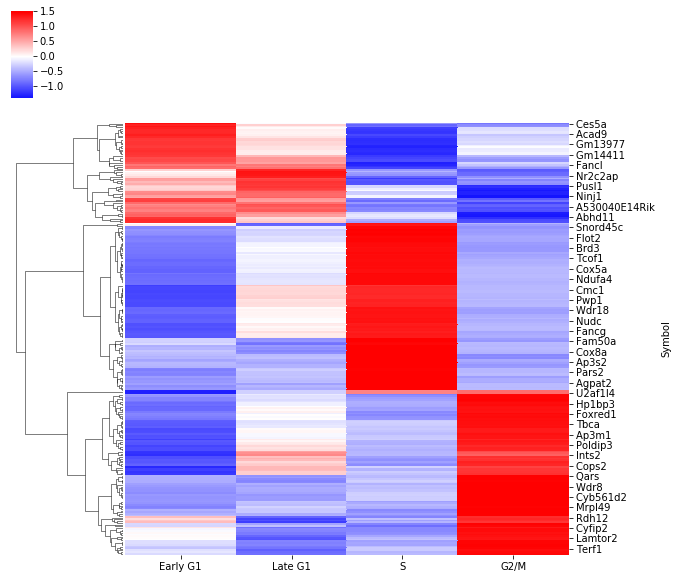

In [109]:
keep_col = ['Early G1','Late G1','S','G2/M']
index = keepers_DF.index
sns.clustermap(cell_cycle_df[keep_col].loc[index],center=0,cmap='bwr',col_cluster=False,z_score=0)

In [110]:
scope = ['https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive']
# Path to .json
path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/ProbeDesign-92ebdb6a17a7.json'
creds = ServiceAccountCredentials.from_json_keyfile_name(path, scope)
client = gspread.authorize(creds)
# Start with a gene list 
expression_worksheet = client.open("Cell_Cycle_Gene_List").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
expression_df

INFO:oauth2client.client:Refreshing access_token


""


In [112]:
keepers_DF.iloc[0]

G1_Z     0.952434
G2M_Z   -0.531786
S_Z      -1.37308
size          0.5
alpha         0.5
color           g
label          G1
Name: Lsm10 , dtype: object

In [132]:
length = len(keepers_DF)
gene_name = expression_worksheet.range('A2:A'+str(length+1))
Early_G1 = expression_worksheet.range('K2:K'+str(length+1))
Late_G1 = expression_worksheet.range('L2:L'+str(length+1))
S = expression_worksheet.range('M2:M'+str(length+1))
G2M = expression_worksheet.range('N2:N'+str(length+1))
G1_Z = expression_worksheet.range('O2:O'+str(length+1))
S_Z = expression_worksheet.range('P2:P'+str(length+1))
G2M_Z = expression_worksheet.range('Q2:Q'+str(length+1))
Flag = expression_worksheet.range('R2:R'+str(length+1))
for i,gene in enumerate(keepers_DF.index):
    row = keepers_DF.loc[gene]
    if len(row)!=7:
        row=row.iloc[0]
    cell_row = cell_cycle_df.loc[gene]
    if len(cell_row)!=11:
        cell_row = cell_row.iloc[0]
    gene_name[i].value = gene
    Early_G1[i].value = cell_row['Early G1']
    Late_G1[i].value = cell_row['Late G1']
    S[i].value = cell_row['S']
    G2M[i].value = cell_row['G2/M']
    G1_Z[i].value = row['G1_Z']
    S_Z[i].value = row['S_Z']
    G2M_Z[i].value = row['G2M_Z']
    Flag[i].value = row['label']
expression_worksheet.update_cells(gene_name)
expression_worksheet.update_cells(Early_G1)
expression_worksheet.update_cells(Late_G1)
expression_worksheet.update_cells(S)
expression_worksheet.update_cells(G2M)
expression_worksheet.update_cells(Late_G1)
expression_worksheet.update_cells(G1_Z)
expression_worksheet.update_cells(S_Z)
expression_worksheet.update_cells(G2M_Z)
expression_worksheet.update_cells(Flag)

{'spreadsheetId': '1MFKa1JiQqkSncZYFB54UyKjCSdNpFHKX8qWUjQSNrGo',
 'updatedRange': 'Sheet1!P2:P249',
 'updatedRows': 248,
 'updatedColumns': 1,
 'updatedCells': 248}

In [141]:
biomart_download_fname_path = '/bigstore/binfo/mouse/mouse_mart_export.txt'
expression_path = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/MERFISH_analysis-master/mouse/Zach/Cornea/Expression/no_versions_isoforms_tracking.csv'
expression_worksheet = client.open("Cell_Cycle_Gene_List").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
FPKM_df = pd.read_csv(open(expression_path, 'r'))
transcript_df = pd.read_csv(open(biomart_download_fname_path, 'r'))
Transcript_IDs = expression_worksheet.range('G2:G'+str(len(expression_df)+1))
Gene_IDs = expression_worksheet.range('F2:F'+str(len(expression_df)+1))
FPKMs = expression_worksheet.range('C2:C'+str(len(expression_df)+1))
lengths = expression_worksheet.range('D2:D'+str(len(expression_df)+1))
Descriptions = expression_worksheet.range('B2:B'+str(len(expression_df)+1))
Genes = expression_worksheet.range('A2:A'+str(len(expression_df)+1))
Isoforms = expression_worksheet.range('I2:I'+str(len(expression_df)+1))
Type = expression_worksheet.range('J2:J'+str(len(expression_df)+1))

flag = 'gene'
FPKM_gene_name_col = 'gene_short_name'
FPKM_gid_col = 'gene_id'
FPKM_tid_col = 'transcript_id'
FPKM_length_col = 'length'
FPKM_FPKM_col = 'FPKM'
tid_col = 'Transcript stable ID'
gid_col = 'Gene stable ID'
ttype_col = 'Transcript type'
gene_name_col = 'Gene name'
gene_description_col = 'Gene description'

completed = []
for i,cell in enumerate(Genes):
    gene = cell.value
    gene = gene.split(' ')[0]
    if gene == '':
        continue
    if gene in completed:
        Type[i].value= 'duplicate'
        print(gene,' duplicated')
    if flag=='gene':
        gid = FPKM_df[FPKM_df[FPKM_gene_name_col] == gene][FPKM_gid_col].unique()
        try:
            if len(gid)==0:
                gid = FPKM_df[FPKM_df[FPKM_gene_name_col] == gene.capitalize()][FPKM_gid_col].unique()
        except:
            pass
        try:
            if len(gid)==0:
                gid = FPKM_df[FPKM_df[FPKM_gene_name_col] == gene.upper()][FPKM_gid_col].unique()
        except:
            pass
    elif flag == 'gid':
        gid = gene
    elif flag == 'tid':
        gid = FPKM_df[FPKM_df[FPKM_tid_col] == gene.split('.')[0]][FPKM_gid_col].unique()
        master_tid = gene.split('.')[0]
    else:
        print('flag is wrong')
    if isinstance(gid,list):
        if len(gid)==0:
            print('gid not found for ',gene,gid)
            continue
        gid = gid[0]
    elif isinstance(gid,np.ndarray):
        if len(gid)==0:
            print('gid not found for ',gene,gid)
            continue
        gid = gid[0]
    else:
        print('gid not found for ',gene)
        continue
    gene_FPKM_df = FPKM_df[FPKM_df[FPKM_gid_col] == gid].drop_duplicates(FPKM_tid_col)
    gene_FPKM_df = gene_FPKM_df.sort_values(FPKM_length_col, ascending=False)
    gene_FPKM_df = gene_FPKM_df.sort_values(FPKM_FPKM_col, ascending=False)
    if len(gene_FPKM_df)==0:
        print('Failed finding: ', gid)
        continue
    tids = [i for i in gene_FPKM_df[FPKM_tid_col] if i != '']
    transcripts = transcript_df[transcript_df[tid_col].isin(tids)]
    transcripts = transcripts[transcripts[ttype_col]=='protein_coding']
    expression = []
    length = []
    for tid in transcripts[tid_col]:
        expression.append(gene_FPKM_df[gene_FPKM_df[FPKM_tid_col]==tid][FPKM_FPKM_col].iloc[0])
        length.append(gene_FPKM_df[gene_FPKM_df[FPKM_tid_col]==tid][FPKM_length_col].iloc[0])
    transcripts[FPKM_FPKM_col]=expression
    transcripts[FPKM_length_col]=length
    transcripts = transcripts.sort_values(FPKM_FPKM_col, ascending=False)
#         tsls = ['tsl1','tsl2','tsl3']
#         final_transcripts = transcripts[transcripts['Transcript support level (TSL)'].isin(tsls)]
#         if len(final_transcripts)>0:
#             transcripts = final_transcripts
    if flag =='tid':
        transcripts = transcripts[transcripts[tid_col]==master_tid]
    if len(transcripts)==0:
        print('Failed finding ', gene)
        continue
    tid = str(transcripts[tid_col].iloc[0])
    Transcript_IDs[i].value = tid
    Gene_IDs[i].value = str(transcripts[gid_col].iloc[0])
    fpkm = transcripts[FPKM_FPKM_col].iloc[0]
    FPKMs[i].value = transcripts[FPKM_FPKM_col].iloc[0]
    lengths[i].value = int(transcripts[FPKM_length_col].iloc[0])
    Descriptions[i].value = str(transcripts[gene_description_col].iloc[0])
    Genes[i].value = str(transcripts[gene_name_col].iloc[0])
    I = gene_FPKM_df[gene_FPKM_df[FPKM_tid_col]==tid][FPKM_FPKM_col].iloc[0]/np.sum(gene_FPKM_df[FPKM_FPKM_col])
    if fpkm==0:
        I = 0
    Isoforms[i].value = I
    completed.append(gene)
expression_worksheet.update_cells(Transcript_IDs)
expression_worksheet.update_cells(FPKMs)
expression_worksheet.update_cells(lengths)
expression_worksheet.update_cells(Descriptions)
#expression_worksheet.update_cells(Genes)
expression_worksheet.update_cells(Gene_IDs)
expression_worksheet.update_cells(Isoforms)
expression_worksheet.update_cells(Type)

gid not found for  Lass5 []
Failed finding  Xist
gid not found for  Rdbp []
gid not found for  Riok2 []
gid not found for  Acpl2 []
Failed finding  Snord45c
U2af1l4  duplicated
gid not found for  D19Ertd737e []
gid not found for  Wdr8 []
gid not found for  Ccdc123 []
Failed finding  Malat1


/home/zach/miniconda3/envs/pyspots/lib/python3.6/site-packages/ipykernel_launcher.py:104: RuntimeWarning:

invalid value encountered in double_scalars



gid not found for  Gm11033 []
gid not found for  Gm14411 []
gid not found for  Gm13977 []
gid not found for  Gm10311 []
gid not found for  A530040E14Rik []
gid not found for  Map1lc3b []
gid not found for  A930001N09Rik []


{'spreadsheetId': '1MFKa1JiQqkSncZYFB54UyKjCSdNpFHKX8qWUjQSNrGo',
 'updatedRange': 'Sheet1!J2:J249',
 'updatedRows': 248,
 'updatedColumns': 1,
 'updatedCells': 248}

In [156]:
expression_worksheet = client.open("Cell_Cycle_Gene_List").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)

Gene_Names = expression_worksheet.range('A2:A'+str(len(expression_df)+1))
for i,gene in enumerate(Gene_Names):
    Gene_Names[i].value = gene.value.split(' ')[0]
        
expression_worksheet.update_cells(Gene_Names)


{'spreadsheetId': '1MFKa1JiQqkSncZYFB54UyKjCSdNpFHKX8qWUjQSNrGo',
 'updatedRange': 'Sheet1!A2:A73',
 'updatedRows': 72,
 'updatedColumns': 1,
 'updatedCells': 72}

In [157]:
readout_names = ['RS0095_cy5','RS0109_cy5','RS0175_cy5','RS0237_cy5','RS0307_cy5',
                 'RS0332_cy5','RS0384_atto565','RS0406_atto565','RS0451_atto565',
                 'RS0468_atto565','RS0548_atto565','RS64.0_atto565','RSN9927.0_cy5',
                 'RSN2336.0_cy5','RSN1807.0_cy5','RSN4287.0_atto565','RSN1252.0_atto565',
                 'RSN9535.0_atto565']
def write_codebook(rows, fname, readout_names, codebook_style = '148MHD4'):
    with open(fname, 'w') as f:
        f.write('version'+','+str(1)+'\n')
        f.write('codebook_name'+','+codebook_style+'\n')
        f.write('bit_names,'+','.join(readout_names)+'\n')
        f.write('name, id, barcode\n')
        for row in rows:
            f.write(','.join([str(row[0]), str(row[1]), str(row[2])+'\n']))
# Generate Codebook
row_tuples = []
expression_worksheet = client.open("Cell_Cycle_Gene_List").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)
for idx, row in expression_df.drop_duplicates('Transcript_ID').iterrows():
    if len(row['Transcript_ID'].split('.')[0])>0:
        #row_tuples.append((row['Gene'], row['Transcript_ID'].split('.')[0], str(row['Barcode']).zfill(18)))
        row_tuples.append((row['Gene'], row['Transcript_ID'].split('.')[0], str('111000000000000001').zfill(18)))
base = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/Cell_Cycle'
if not os.path.exists(base):
    os.mkdir(base)
write_codebook(row_tuples, os.path.join(base,'Codebook_25Oct2019.txt'), readout_names)
row_tuples

[('Fgd4', 'ENSMUST00000161861', '111000000000000001'),
 ('Pikfyve', 'ENSMUST00000081154', '111000000000000001'),
 ('Gpatch4', 'ENSMUST00000029707', '111000000000000001'),
 ('Zhx1', 'ENSMUST00000070143', '111000000000000001'),
 ('Setdb1', 'ENSMUST00000107170', '111000000000000001'),
 ('Tcp11l2', 'ENSMUST00000020223', '111000000000000001'),
 ('Neurl3', 'ENSMUST00000056946', '111000000000000001'),
 ('Srsf7', 'ENSMUST00000063417', '111000000000000001'),
 ('Zfp36', 'ENSMUST00000209061', '111000000000000001'),
 ('Cyb5r4', 'ENSMUST00000168529', '111000000000000001'),
 ('Icam1', 'ENSMUST00000086399', '111000000000000001'),
 ('Mat2a', 'ENSMUST00000059472', '111000000000000001'),
 ('Cyhr1', 'ENSMUST00000081291', '111000000000000001'),
 ('Elp3', 'ENSMUST00000022609', '111000000000000001'),
 ('Pik3cg', 'ENSMUST00000053215', '111000000000000001'),
 ('Atl2', 'ENSMUST00000068282', '111000000000000001'),
 ('Ubap2 ', 'ENSMUST00000030143', '111000000000000001'),
 ('Leo1', 'ENSMUST00000048937', '11100000

In [158]:
# Parse Fasta
base = '/bigstore/GeneralStorage/Zach/MERFISH/Probe_Design/results/Cell_Cycle'
f = os.path.join(base,'Third_Pass','Cell_Cycle_oligos.fasta')
from Bio import SeqIO
with open(f) as fasta_file:  # Will close handle cleanly
    gene = []
    gid = []
    seqs = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):  # (generator)
        name = seq_record.description.split(' ')
        seqs.append(str(seq_record.seq))
        for i in name:
            if 'ENS' in i:
                gene.append(i.split('_')[0])
                gid.append(i.split('_')[2])
fasta = pd.DataFrame(columns = ['gene','gene_ID','sequence'])
fasta['gene'] = gene
fasta['gene_ID'] = gid
fasta['sequence'] = seqs
fasta

,gene,gene_ID,sequence
0,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCAGTAGGTGTTATGTTAGGAGGATGAAA...
1,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCAAGAGTGAGTAGTAGTGGAGTAATTCC...
2,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCATGAAAGGAATGGGTTGTGGTACGGAT...
3,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCATGAAAGGAATGGGTTGTGGTAGTAGG...
4,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCAAGAGTGAGTAGTAGTGGAGTAACAAT...
5,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCATGTGATGGAAGTTAGAGGGTACACAG...
6,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCATGAAAGGAATGGGTTGTGGTAGTAGG...
7,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCAAGAGTGAGTAGTAGTGGAGTAGGGCC...
8,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCATGAAAGGAATGGGTTGTGGTAAGAGT...
9,Fgd4,ENSMUST00000161861,AGATGATGTCGCACACGCCAAGAGTGAGTAGTAGTGGAGTAGAAGT...


In [162]:
expression_worksheet = client.open("Cell_Cycle_Gene_List").sheet1
expression = expression_worksheet.get_all_records()
expression_df = pd.DataFrame(expression)

gene_name = expression_worksheet.range('A2:A'+str(len(expression_df)+1))
oligos = expression_worksheet.range('E2:E'+str(len(expression_df)+1))
for i,gene in enumerate(gene_name):
    gene = gene.value
    if len(gene)>0:
        oligos[i].value = len(fasta[fasta['gene']==gene])
expression_worksheet.update_cells(oligos)

{'spreadsheetId': '1MFKa1JiQqkSncZYFB54UyKjCSdNpFHKX8qWUjQSNrGo',
 'updatedRange': 'Sheet1!E2:E73',
 'updatedRows': 72,
 'updatedColumns': 1,
 'updatedCells': 72}